In [3]:
import numpy as np
from sage.all import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%reload_ext autoreload
%autoreload 2

import Wigner

In [4]:
# Load data
F = GF(2**5, 'a')

mubs = np.load('MUBS/2-5-desarguesian.npy')
mubs_kantor = np.load('MUBS/2-5-kantor.npy')

In [12]:
wootters = Wigner.Wigner(F, mubs, op='desargues')
kantor   = Wigner.Wigner(F, mubs_kantor, op='kantor')

<Axes: >

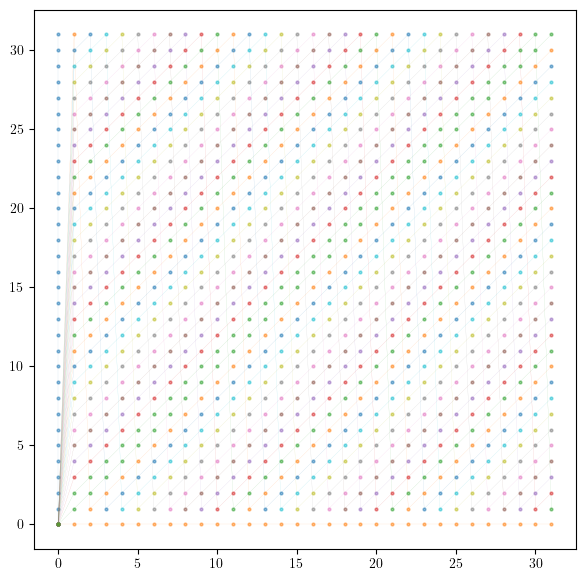

In [15]:
def affineAx(F):
    d = F.order()
    fig, ax = plt.subplots(figsize=(7,7))

    # ax.set_xticks(range(d))
    # ax.set_yticks(range(d))

    # labels = ['$' + str(e) + '$' for e in F]
    # labels = list(F)
    # labels = ['0', r'$\alpha$', r'$\alpha + 1$', '1']
    labels = range(d)
    # ax.set_xticklabels(labels)
    # ax.set_yticklabels(labels)
    
    return fig, ax

def plotSpread(lines, ax):
    for i, line in enumerate(lines):
        x, y = np.array(line).T
        x = [wootters.toInt(e) for e in x]
        y = [wootters.toInt(e) for e in y]

        alpha = 0.5

        ax.plot(
            x, y,
            marker='o',
            linewidth=0.1,
            markersize=2,
            alpha=alpha
        )
    return ax

fig, ax = affineAx(F)
lines = wootters.Spread()
plotSpread(lines, ax)

<Axes: >

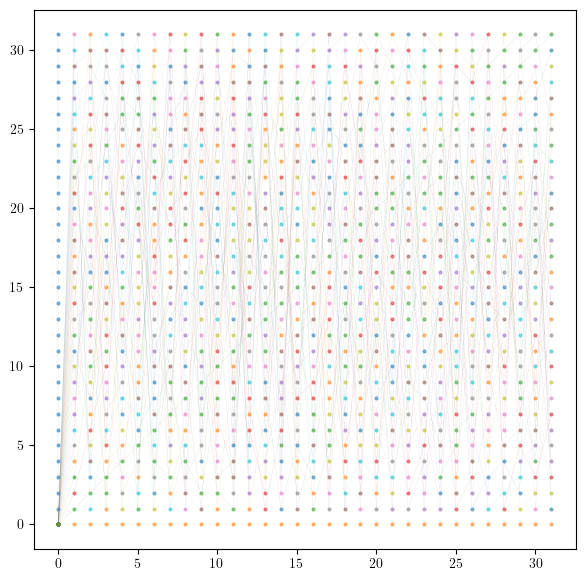

In [16]:
fig, ax = affineAx(F)
lines = kantor.Spread()
plotSpread(lines, ax)

In [22]:
def wigner3d(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # x axis
    # ax.axes.xaxis.set_major_locator(plt.IndexLocator(1, 0))

    # y axis
    # ax.axes.yaxis.set_major_locator(plt.IndexLocator(1, -1))
    # ax.invert_yaxis()

    # labels_x = [r'$\uparrow\uparrow$',
    #           r'$\uparrow\downarrow$',
    #           r'$\downarrow\uparrow$',
    #           r'$\downarrow\downarrow$']
    # labels_y = [r'$\rightarrow\rightarrow$',
    #           r'$\rightarrow\leftarrow$',
    #           r'$\leftarrow\rightarrow$',
    #           r'$\leftarrow\leftarrow$']
    # ax.set_xticklabels(labels_x)
    # ax.set_yticklabels(labels_y)
    # ax.set_xticklabels(range(n))
    # ax.set_yticklabels(range(n))

    # z axis
    # ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([-0.015, 0.035])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.1)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

In [47]:
def wignerHeat(M, rotate=False):
    if rotate:
        M = np.rot90(M, -1)
    
    fig, ax = plt.subplots()
    im = ax.imshow(M, origin='lower')
    fig.colorbar(im)

    return fig, ax
    

In [19]:
# Examples
s1 = mubs_kantor[32*5:32*6,5]
w = wootters.WignerMatrix(wootters.npProj(s1))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

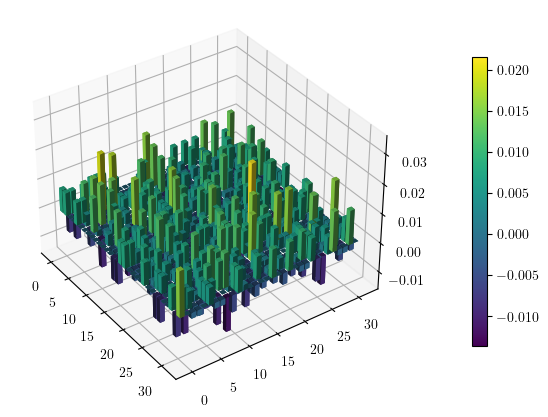

In [21]:
wigner3d(w)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

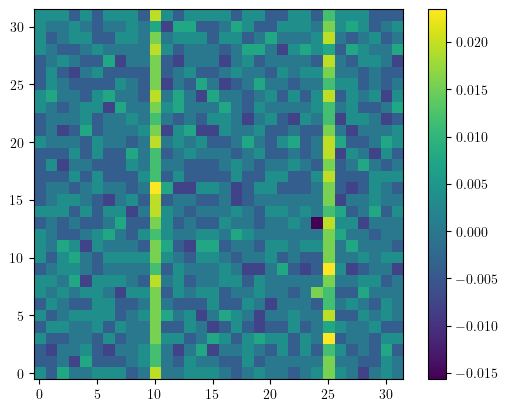

In [48]:
wignerHeat(w)

In [28]:
s2 = mubs[0:32, 10] + mubs[0:32, 25]
s2 = wootters.npProj(s2 / np.linalg.norm(s2))

In [29]:
w = wootters.WignerMatrix(s2)
wk = kantor.WignerMatrix(s2)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

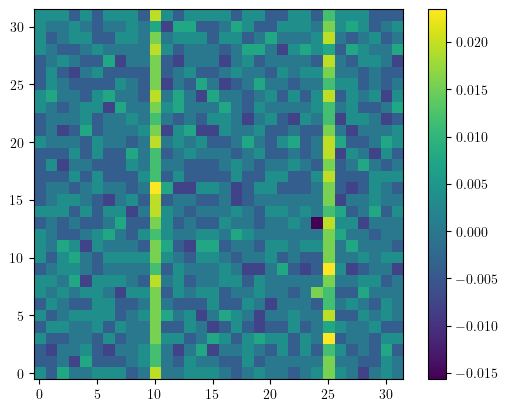

In [49]:
wignerHeat(w)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

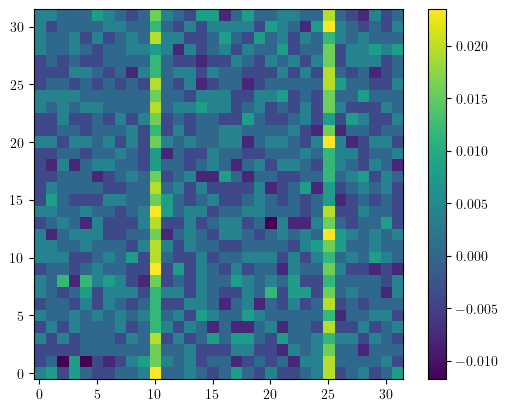

In [50]:
wignerHeat(wk)